C:\Users\gites\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 5.1216e-05 - val_loss: 0.0012
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 6.3769e-05 - val_loss: 9.9820e-04
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 5.2213e-05 - val_loss: 0.0016
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 5.3954e-05 - val_loss: 8.9914e-04
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 5.0532e-05 - val_loss: 8.9524e-04
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 5.0344e-05 - val_loss: 8.2657e-04
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.8009e-05 - val_loss: 0.0014
Epoch 9/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.3478e-05 - val_loss: 7.3368e-04
Epoch 10/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 3.8808e-05 - val_loss: 0.0010
Epoch 11/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.4610e-05

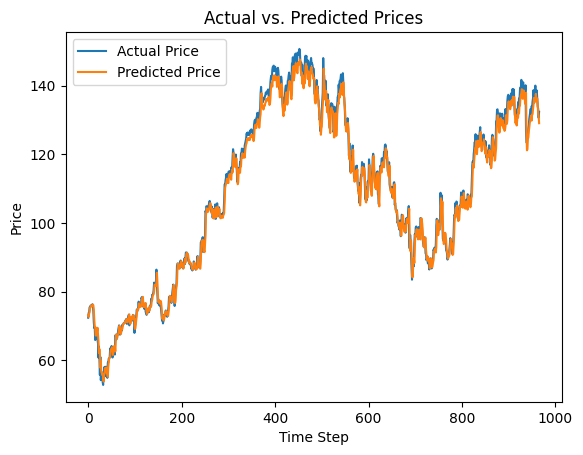

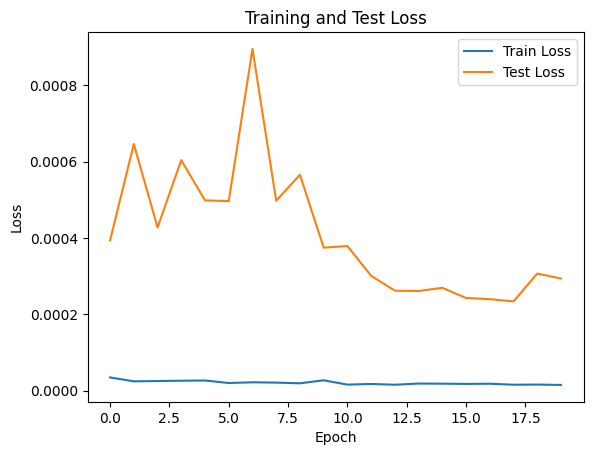

Training time: 81.76233649253845


In [6]:
'''A4Recurrent neural network (RNN) Use the Google stock prices dataset and design a time
series analysis and prediction system using RNN'''
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

# Load the dataset
data = pd.read_csv('GOOG.csv')

# Extract 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the prices
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(prices)

# Function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences with a sequence length of 30 days
sequence_length = 30
X, y = create_sequences(normalized_prices, sequence_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
start_time = time.time()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))
# Train the model
start_time = time.time()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))

training_time = time.time() - start_time

# Print train and test loss
print("Train Loss:", history.history['loss'])
print("Test Loss:", history.history['val_loss'])

training_time = time.time() - start_time

# Predictions on test set
y_pred = model.predict(X_test)

# Denormalize predictions and actual prices
y_pred_denormalized = scaler.inverse_transform(y_pred)
y_test_denormalized = scaler.inverse_transform(y_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)

# Function to visualize actual vs predicted prices
def visualize_predictions():
    plt.plot(y_test_denormalized, label='Actual Price')
    plt.plot(y_pred_denormalized, label='Predicted Price')
    plt.xlabel('Time Step')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Actual vs. Predicted Prices')
    plt.show()

# Function to visualize training history
def visualize_training():
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Test Loss')
    plt.show()

# GUI
def predict_price():
    try:
        # Get user input
        lookback_days = int(entry.get())

        # Prepare input data
        last_sequence = normalized_prices[-sequence_length:]
        X_input = last_sequence.reshape(1, sequence_length, 1)

        # Predict future prices
        predicted_price = model.predict(X_input)

        # Denormalize predicted price
        predicted_price = scaler.inverse_transform(predicted_price)

        # Display the predicted price and accuracy (MAE)
        result_label.config(text=f"Predicted Price: ${predicted_price[0][0]:.2f}\nMAE on Test Data: {mae:.2f}")

    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create tkinter window
window = tk.Tk()
window.title("Stock Price Prediction")

# Create GUI elements
label = tk.Label(window, text="Enter number of past days to consider:")
label.pack()

entry = tk.Entry(window)
entry.pack()

button_predict = tk.Button(window, text="Predict", command=predict_price)
button_predict.pack()

button_visualize = tk.Button(window, text="Visualize", command=visualize_predictions)
button_visualize.pack()

button_visualize_train = tk.Button(window, text="Visualize Training", command=visualize_training)
button_visualize_train.pack()

result_label = tk.Label(window, text="")
result_label.pack()

# Run the GUI main loop
window.mainloop()

print("Training time:", training_time)


In [7]:
'''A4Recurrent neural network (RNN) Use the Google stock prices dataset and design a time
series analysis and prediction system using RNN'''
#importing libraries
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [8]:
# Load the dataset
data = pd.read_csv('GOOG.csv')

In [9]:
# Extract 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

In [ ]:
# Normalize the prices
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(prices)

In [10]:
# Function to create sequences for RNN
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i + seq_length])
    y.append(data[i + seq_length])
  return np.array(X), np.array(y)

In [11]:
# Create sequences with a sequence length of 30 days
sequence_length = 30
X, y = create_sequences(normalized_prices, sequence_length)

In [12]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [13]:
# Build the RNN model
model = Sequential([
  LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
  LSTM(units=50),
  Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\gites\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predictions on test set
y_pred = model.predict(X_test)


Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0035
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 5.5569e-05
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 5.7905e-05
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 5.6237e-05
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 5.4039e-05
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 4.7709e-05
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 5.0675e-05
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.4791e-05
Epoch 9/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 4.7365e-05
Epoch 10/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 4.2678e-05
Epoch 11/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 4.2742e-05
Epoch 12/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 4.2827e-05
Epoch 13/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 3.7029e-05
Epoch 14/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 4

In [15]:
# Denormalize predictions and actual prices
y_pred_denormalized = scaler.inverse_transform(y_pred)
y_test_denormalized = scaler.inverse_transform(y_test)

In [16]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)

In [17]:
# Function to visualize actual vs predicted prices
def visualize_predictions():
  plt.plot(y_test_denormalized, label='Actual Price')
  plt.plot(y_pred_denormalized, label='Predicted Price')
  plt.xlabel('Time Step')
  plt.ylabel('Price')
  plt.legend()
  plt.title('Actual vs. Predicted Prices')
  plt.show()

In [19]:
 #GUI
def predict_price():
  try:
    # Get user input
    lookback_days = int(entry.get())

    # Prepare input data
    last_sequence = normalized_prices[-sequence_length:]
    X_input = last_sequence.reshape(1, sequence_length, 1)

    # Predict future prices
    predicted_price = model.predict(X_input)

    # Denormalize predicted price
    predicted_price = scaler.inverse_transform(predicted_price)

    # Display the predicted price and accuracy (MAE)
    result_label.config(text=f"Predicted Price: ${predicted_price[0][0]:.2f}\nMAE on Test Data: {mae:.2f}")

  except Exception as e:
    messagebox.showerror("Error", str(e))

# Create tkinter window
window = tk.Tk()
window.title("Stock Price Prediction")

# Create GUI elements
label = tk.Label(window, text="Enter number of past days to consider:")
label.pack()

entry = tk.Entry(window)
entry.pack()

button_predict = tk.Button(window, text="Predict", command=predict_price)
button_predict.pack()

button_visualize = tk.Button(window, text="Visualize", command=visualize_predictions)
button_visualize.pack()

result_label = tk.Label(window, text="")
result_label.pack()

In [20]:
# Run the GUI main loop
window.mainloop()